<a href="https://colab.research.google.com/github/Miguel-neuron/Berserk-programming/blob/main/PCA_Script_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 10> Principal Component Analysis </font>

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from ctypes import c_int64
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [103]:
#Dar click en la carpeta del lado izquierdo en el menú desplegable
#Arrastrar el archivo excel

#Si el archivo es del tipo .csv correr la celda (el archivo recibido debe ser del tipo matriz de distancias)

data = pd.read_csv("/content/Matriz_distancias_total_python.csv")
data

,"Gustavo A. Madero, Ciudad de México, 7790","Cuauhtémoc, Ciudad de México, 6500","Miguel Hidalgo, Ciudad de México, 11410","Gustavo A. Madero, Ciudad de México, 7650","Benito Juárez, Ciudad de México, 3100","Miguel Hidalgo, Ciudad de México, 11000","Miguel Hidalgo, Ciudad de México, 11920","Miguel Hidalgo, Ciudad de México, 11800","Álvaro Obregón, Ciudad de México, 1140","Coyoacán, Ciudad de México, 4300",...,"Gustavo A. Madero, Ciudad de México, 7750","Gustavo A. Madero, Ciudad de México, 7550","Cuauhtémoc, Ciudad de México, 6030","Azcapotzalco, Ciudad de México, 2300","Azcapotzalco, Ciudad de México, 2600","Miguel Hidalgo, Ciudad de México, 11400","Venustiano Carranza, Ciudad de México, 15300","Azcapotzalco, Ciudad de México, 2080","Miguel Hidalgo, Ciudad de México, 11520","Gustavo A. Madero, Ciudad de México, 7970"
0,1.0,8.5,7.7,8.0,16.0,14.2,18.3,12.8,13.6,27.2,...,5.5,13.7,5.8,6.9,2.5,6.8,6.2,5.3,10.6,10.5
1,7.8,1.0,5.2,13.1,6.8,6.6,10.9,5.9,7.8,17.7,...,10.6,17.8,2.2,8.7,6.3,3.2,11.0,4.7,3.2,15.4
2,7.0,4.2,1.0,16.5,11.3,7.4,11.0,8.1,10.9,29.1,...,9.2,18.3,5.2,9.2,5.8,1.3,11.5,2.9,2.4,15.8
3,6.1,12.3,13.8,1.0,19.8,20.9,22.1,16.7,17.4,33.3,...,3.6,16.0,10.5,3.7,6.0,10.3,12.3,9.2,16.2,16.6
4,12.9,6.7,12.9,18.1,1.0,11.0,11.6,3.1,6.1,9.1,...,15.6,20.3,7.2,16.2,13.8,10.9,14.1,12.6,11.0,16.5
5,15.1,7.1,8.2,22.2,11.3,1.0,4.2,8.9,7.6,25.8,...,23.8,27.1,9.5,22.6,13.1,7.8,20.8,8.8,5.8,23.3
6,18.3,10.6,11.7,25.7,12.7,4.3,1.0,9.9,6.4,25.0,...,17.8,28.1,12.6,18.6,16.2,11.4,20.9,12.3,9.3,24.3
7,12.2,4.6,9.3,17.4,3.5,8.3,10.5,1.0,3.0,20.6,...,11.8,19.5,6.6,12.6,10.2,7.3,13.2,9.0,7.4,15.7
8,14.1,6.4,11.2,19.3,5.2,5.6,6.2,2.9,1.0,14.9,...,13.7,21.1,8.5,14.5,12.1,9.2,14.8,10.9,7.1,17.2
9,27.1,16.4,21.1,32.0,9.6,25.3,25.7,19.9,19.7,1.0,...,29.5,25.1,18.2,30.9,28.3,19.2,22.4,30.8,24.5,21.3


In [82]:
#Si el archivo es del tipo .xlsx correr esta celda
data = pd.read_excel("/content/Matriz_distancias_total_python.xlsx")
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/Matriz_distancias_total_python.xlsx'

In [104]:
#Correr el constructor de la clase pca

class pca:
  def __init__(self,data):
    self.data = data

  def labels_name(self):
    names = self.data.columns
    names = np.array(names)
    labels = names
    return labels

  def data_normalization(self):
    x_max = np.array(self.data.max())
    s_min = np.array(self.data.min())
    scaler = MinMaxScaler()
    scaler_df = scaler.fit_transform(self.data)
    scaled_data = pd.DataFrame(scaler_df,columns = labels)
    return scaled_data

  def data_located_rows(self,scaled_data):
    shape = scaled_data.shape
    shape = shape[0]
    rows_data = []

    for i in range(shape):
      row = np.array(scaled_data.loc[i:i])
      rows_data.append(row)
      rows_datas = np.concatenate(rows_data)

    return rows_datas

  def PCA(self,rows_datas):
    pca = PCA(n_components=2)
    rows_data_pca = pca.fit_transform(rows_datas)
    return rows_data_pca

  def kmeans(self,rows_data_pca):
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(rows_data_pca)
    labels_k = kmeans.labels_
    return labels_k

  def PCA_Graph(self,rows_data_pca,labels):

    plt.figure(figsize=(10,10))
    scatter = plt.scatter(rows_data_pca[:, 0], rows_data_pca[:, 1], c='b', marker='o')
    plt.title("PCA")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")

    for i, nombre in enumerate(labels):
      plt.annotate(nombre, (rows_data_pca[i, 0], rows_data_pca[i, 1]), fontsize=10, color='black')
    plt.show()

  def PCA_Kmeans_Graph(self,rows_data_pca,labels_k,labels_excel):

    plt.figure(figsize=(15, 15))
    scatter = plt.scatter(rows_data_pca[:, 0], rows_data_pca[:, 1], c=labels_k, cmap='viridis', marker='o')
    plt.title("KMeans Clustering - 2 Componentes Principales (PCA)")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.colorbar(scatter, label='Cluster')
    for i, nombre in enumerate(labels_excel):
      plt.annotate(nombre, (rows_data_pca[i, 0], rows_data_pca[i, 1]), fontsize=8, color='black',rotation = 10)
      #plt.annotate(nombre, (data_som_pca[i, 0], data_som_pca[i, 1]), fontsize=8, color='black',rotation=30)
    plt.show()


In [105]:
algorithm = pca(data)

labels = algorithm.labels_name()

scaled_data = algorithm.data_normalization()

rows_data = algorithm.data_located_rows(scaled_data)

principal_cp_rows = algorithm.PCA(rows_data)



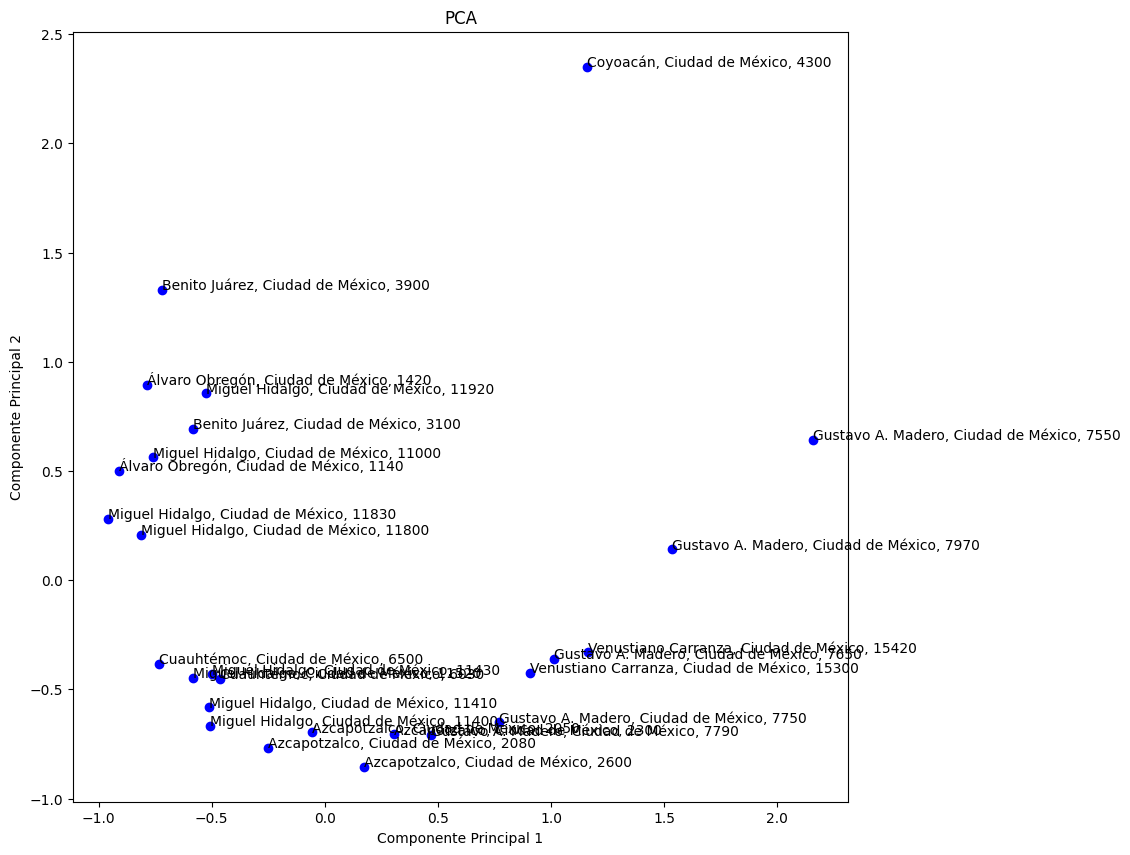

In [106]:
algorithm.PCA_Graph(principal_cp_rows,labels)

<font size = 10> Aplicar K-means al gráfico

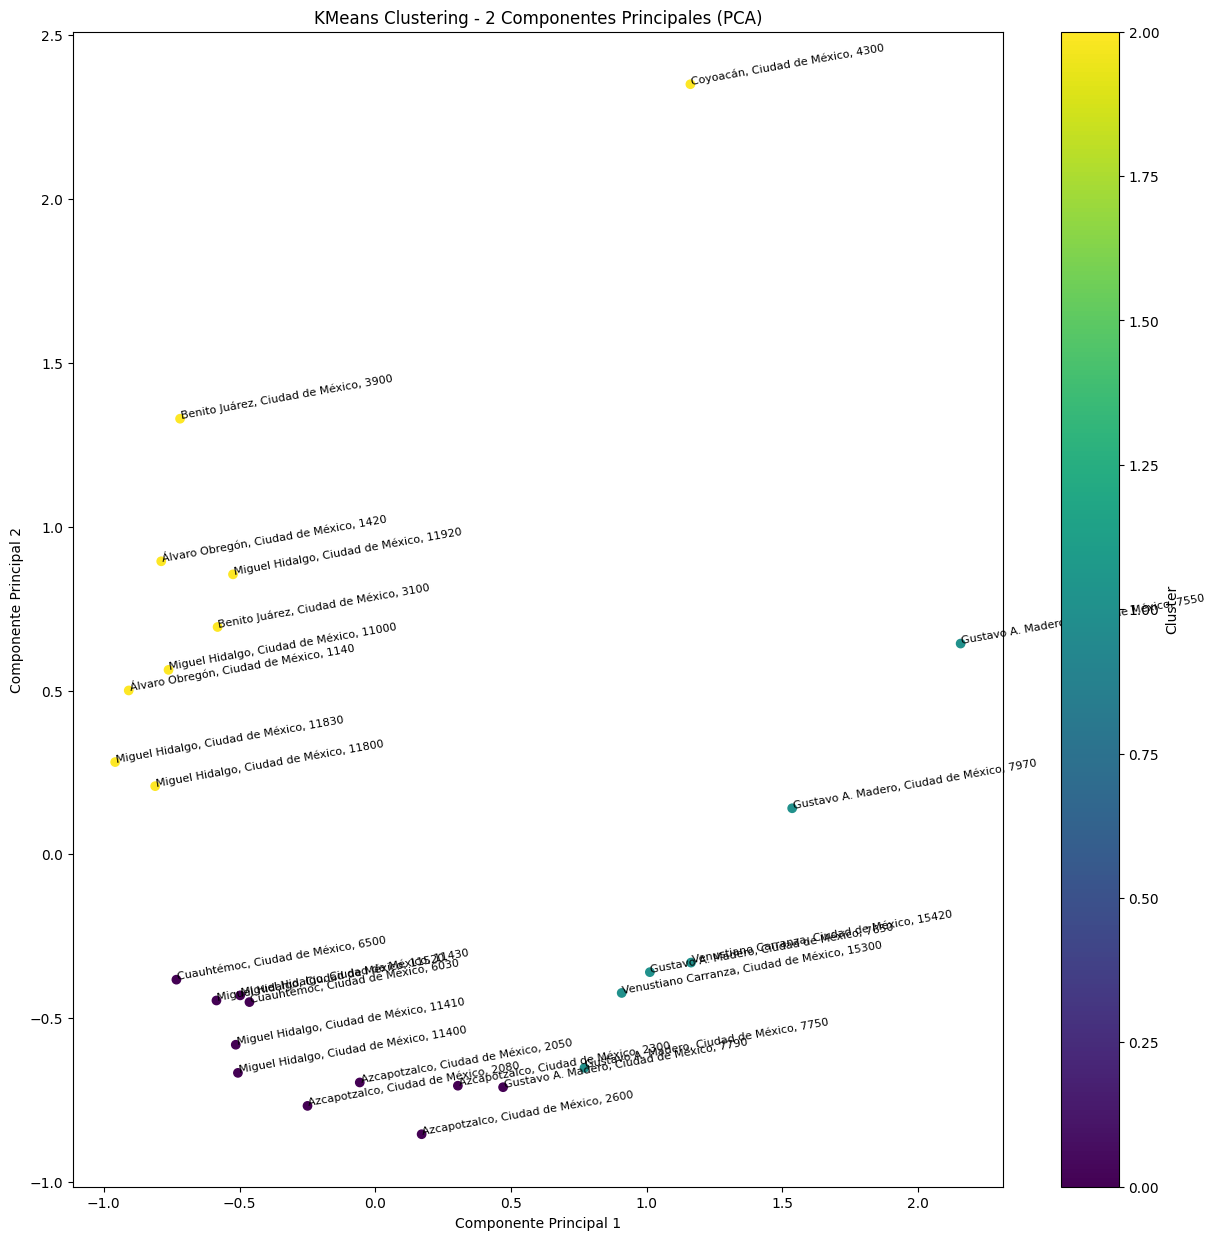

In [107]:
labels_k = algorithm.kmeans(principal_cp_rows)

algorithm.PCA_Kmeans_Graph(principal_cp_rows,labels_k,labels)